In [48]:
from SINDyFunctions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# ---plotting function---
def plotWithQuartiles(x,mean,q1,q3,label,color):
    plt.plot(x,mean,label=label,color=color)
    plt.fill_between(x,q1,q3,color=color,alpha=0.5)

### Rossler

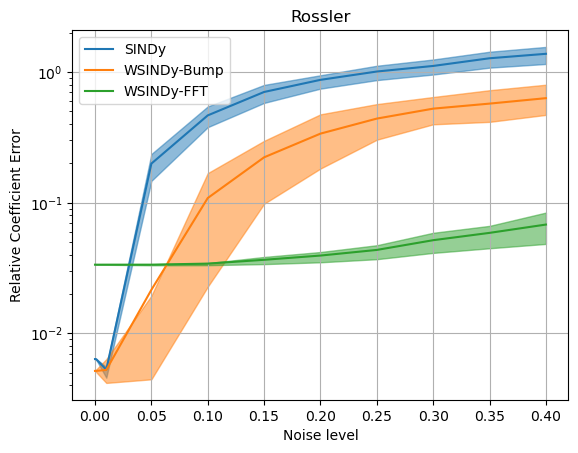

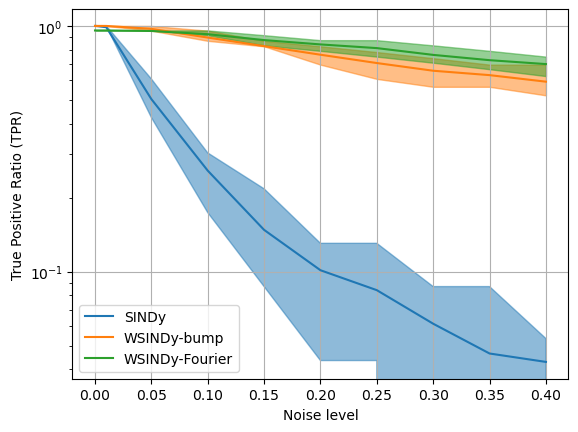

In [49]:
# ---load data---
data = loadmat("ResultsLog/results_noiseLevelAndCoeffs_Rossler.mat")

arr_sig_NR = data["arr_sig_NR"].flatten()
arr_w_SINDy = data["arr_w_SINDy"]
arr_w_bump = data["arr_w_bumpWSINDy"]
arr_w_fft = data["arr_w_FFTWSINDy"]

# true coefficient matrices
a = 0.2
b = 0.2
c = 5.7
w_true = np.zeros((10,3))
w_true[2,0] = -1
w_true[3,0] = -1
w_true[1,1] = 1
w_true[2,1] = a
w_true[0,2] = b
w_true[3,2] = -c
w_true[9,2] = 1

# ---statistics---
res_SINDy = batchErrorEval(w_true,arr_w_SINDy)
res_bump = batchErrorEval(w_true,arr_w_bump)
res_fft = batchErrorEval(w_true,arr_w_fft)

# ---Noise level vs. coefficient error---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["error_mean"],res_SINDy["error_q1"],res_SINDy["error_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR,res_bump["error_mean"],res_bump["error_q1"],res_bump["error_q3"],"WSINDy-Bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["error_mean"],res_fft["error_q1"],res_fft["error_q3"],"WSINDy-FFT","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("Relative Coefficient Error")
plt.title("Rossler")
plt.legend()
plt.grid(True)

# ---Noise level vs. TPR---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["TPR_mean"],res_SINDy["TPR_q1"],res_SINDy["TPR_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR, res_bump["TPR_mean"],res_bump["TPR_q1"],res_bump["TPR_q3"],"WSINDy-bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["TPR_mean"],res_fft["TPR_q1"],res_fft["TPR_q3"],"WSINDy-Fourier","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("True Positive Ratio (TPR)")
plt.legend()
plt.grid(True)

plt.show()

### Lorenz

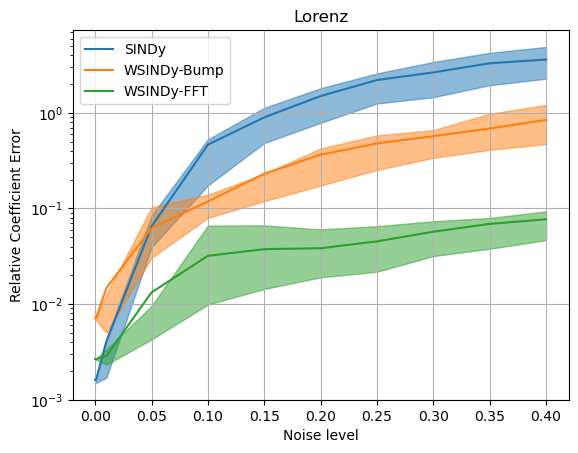

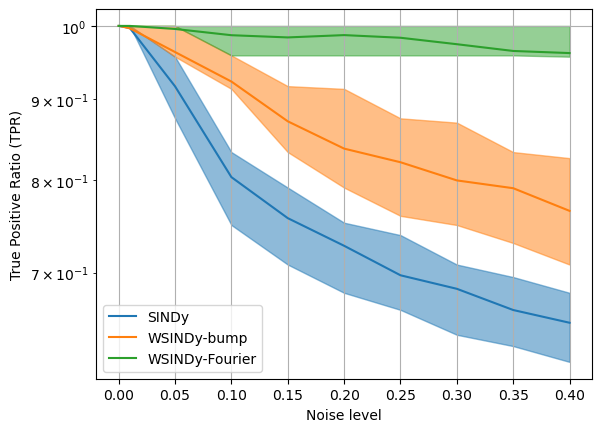

In [50]:
# ---load data---
data = loadmat("ResultsLog/results_noiseLevelAndCoeffs_Lorenz.mat")

arr_sig_NR = data["arr_sig_NR"].flatten()
arr_w_SINDy = data["arr_w_SINDy"]
arr_w_bump = data["arr_w_bumpWSINDy"]
arr_w_fft = data["arr_w_FFTWSINDy"]

# true coefficient matrices
sigma = 10
rho = 28
beta = 8/3
w_true = np.zeros((10,3))
w_true[1,0] = -sigma
w_true[2,0] = sigma
w_true[1,1] = rho
w_true[2,1] = -1
w_true[9,1] = -1
w_true[3,2] = -beta
w_true[7,2] = 1

# ---statistics---
res_SINDy = batchErrorEval(w_true,arr_w_SINDy)
res_bump = batchErrorEval(w_true,arr_w_bump)
res_fft = batchErrorEval(w_true,arr_w_fft)

# ---Noise level vs. coefficient error---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["error_mean"],res_SINDy["error_q1"],res_SINDy["error_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR,res_bump["error_mean"],res_bump["error_q1"],res_bump["error_q3"],"WSINDy-Bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["error_mean"],res_fft["error_q1"],res_fft["error_q3"],"WSINDy-FFT","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("Relative Coefficient Error")
plt.title("Lorenz")
plt.legend()
plt.grid(True)

# ---Noise level vs. TPR---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["TPR_mean"],res_SINDy["TPR_q1"],res_SINDy["TPR_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR, res_bump["TPR_mean"],res_bump["TPR_q1"],res_bump["TPR_q3"],"WSINDy-bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["TPR_mean"],res_fft["TPR_q1"],res_fft["TPR_q3"],"WSINDy-Fourier","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("True Positive Ratio (TPR)")
plt.legend()
plt.grid(True)

plt.show()

### Lotka-Volterra

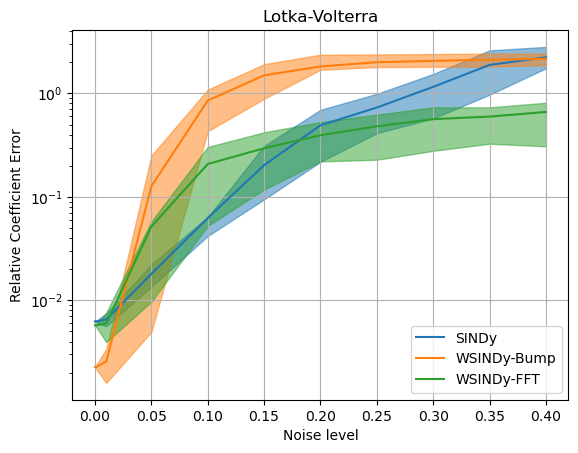

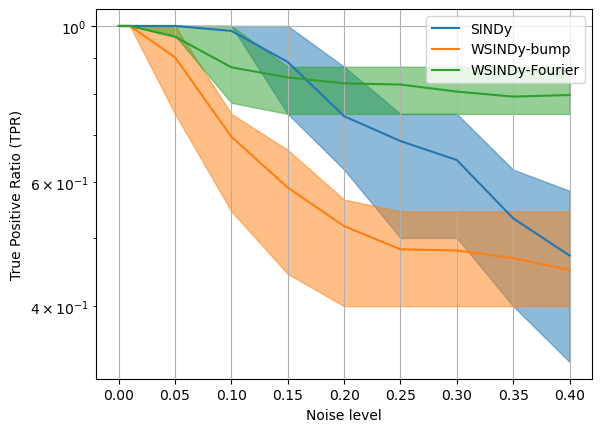

In [51]:
# ---load data---
data = loadmat("ResultsLog/results_noiseLevelAndCoeffs_LV.mat")

arr_sig_NR = data["arr_sig_NR"].flatten()
arr_w_SINDy = data["arr_w_SINDy"]
arr_w_bump = data["arr_w_bumpWSINDy"]
arr_w_fft = data["arr_w_FFTWSINDy"]

# true coefficient matrices
beta = 1
w_true = np.zeros((6,2))
w_true[1,0] = 3
w_true[5,0] = -beta
w_true[2,1] = -6
w_true[5,1] = beta

# ---statistics---
res_SINDy = batchErrorEval(w_true,arr_w_SINDy)
res_bump = batchErrorEval(w_true,arr_w_bump)
res_fft = batchErrorEval(w_true,arr_w_fft)

# ---Noise level vs. coefficient error---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["error_mean"],res_SINDy["error_q1"],res_SINDy["error_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR,res_bump["error_mean"],res_bump["error_q1"],res_bump["error_q3"],"WSINDy-Bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["error_mean"],res_fft["error_q1"],res_fft["error_q3"],"WSINDy-FFT","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("Relative Coefficient Error")
plt.title("Lotka-Volterra")
plt.legend()
plt.grid(True)

# ---Noise level vs. TPR---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["TPR_mean"],res_SINDy["TPR_q1"],res_SINDy["TPR_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR, res_bump["TPR_mean"],res_bump["TPR_q1"],res_bump["TPR_q3"],"WSINDy-bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["TPR_mean"],res_fft["TPR_q1"],res_fft["TPR_q3"],"WSINDy-Fourier","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("True Positive Ratio (TPR)")
plt.legend()
plt.grid(True)

plt.show()

### VDP

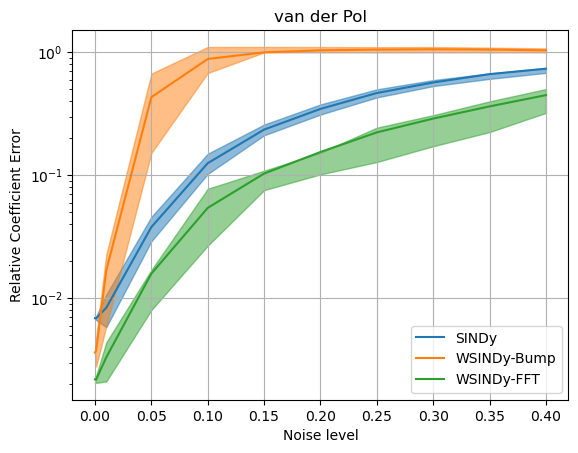

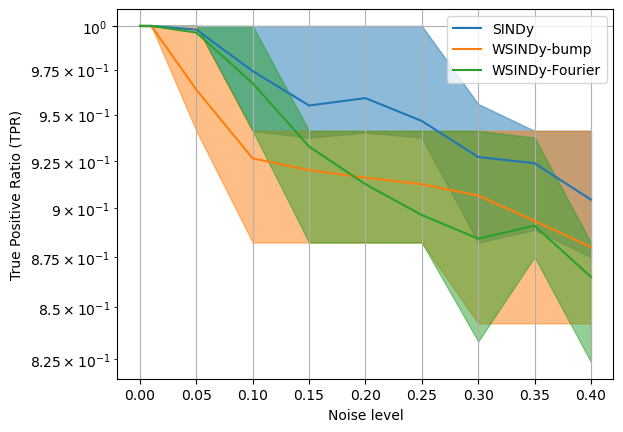

In [52]:
# ---load data---
data = loadmat("ResultsLog/results_noiseLevelAndCoeffs_VDP.mat")

arr_sig_NR = data["arr_sig_NR"].flatten()
arr_w_SINDy = data["arr_w_SINDy"]
arr_w_bump = data["arr_w_bumpWSINDy"]
arr_w_fft = data["arr_w_FFTWSINDy"]

# true coefficient matrices
mu = 10
w_true = np.zeros((10,2))
w_true[2,0] = 1
w_true[1,1] = -1
w_true[2,1] = mu
w_true[8,1] = -mu

# ---statistics---
res_SINDy = batchErrorEval(w_true,arr_w_SINDy)
res_bump = batchErrorEval(w_true,arr_w_bump)
res_fft = batchErrorEval(w_true,arr_w_fft)

# ---Noise level vs. coefficient error---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["error_mean"],res_SINDy["error_q1"],res_SINDy["error_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR,res_bump["error_mean"],res_bump["error_q1"],res_bump["error_q3"],"WSINDy-Bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["error_mean"],res_fft["error_q1"],res_fft["error_q3"],"WSINDy-FFT","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("Relative Coefficient Error")
plt.title("van der Pol")
plt.legend()
plt.grid(True)

# ---Noise level vs. TPR---
plt.figure()
plotWithQuartiles(arr_sig_NR,res_SINDy["TPR_mean"],res_SINDy["TPR_q1"],res_SINDy["TPR_q3"],"SINDy","C0")
plotWithQuartiles(arr_sig_NR, res_bump["TPR_mean"],res_bump["TPR_q1"],res_bump["TPR_q3"],"WSINDy-bump","C1")
plotWithQuartiles(arr_sig_NR, res_fft["TPR_mean"],res_fft["TPR_q1"],res_fft["TPR_q3"],"WSINDy-Fourier","C2")
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Noise level")
plt.ylabel("True Positive Ratio (TPR)")
plt.legend()
plt.grid(True)

plt.show()